In [38]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify



In [39]:
latexify(width_scale_factor=1.1, fig_height=1.5)

/mnt/c/work/srip/ML/kevin_murphy/review/srip_env/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [40]:
def softmax(a):

    """
    Defining the softmax function
    a - input vector
    """
    e = jnp.exp((1.0 * jnp.array(a)))
    return e / jnp.sum(e)

In [41]:
"""
T - list of Temperature values
a - input logits to softmax
"""
T = [100, 2, 1]
a = jnp.array([3, 0, 1])

/mnt/c/work/srip/ML/kevin_murphy/review/srip_env/lib/python3.8/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


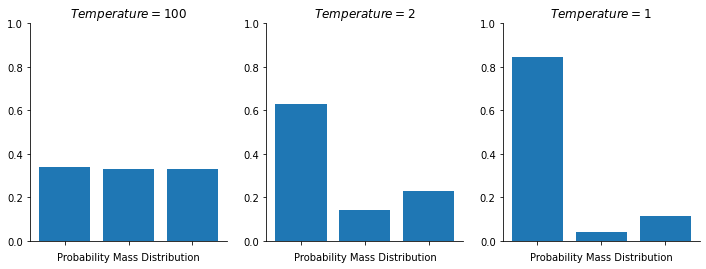

In [43]:
ind = [1, 2, 3]
plt.figure(figsize=(12, 4))
for i in range(len(T)):
    plt.subplot(1, 3, i + 1)
    plt.bar(ind, softmax(a / T[i]))
    plt.title("$Temperature = %d$" % T[i])
    plt.xlabel("Probability Mass Distribution")
    plt.ylim(0, 1)
    ax = plt.gca()
    ax.set_xticklabels([])
    sns.despine()
    save_name = "softmax_pmf_latexified"
savefig(save_name, dpi=300)

In [44]:
def make_graph(data):
    ind = [1, 2, 3]
    a = jnp.array([3, 0, 1])
    T = data["T"]
    plt.bar(ind, softmax(a / T))
    plt.title(f"$Temperature = {T}$")
    plt.xlabel("Probability Mass Distribution")
    plt.ylim(0, 1)
    sns.despine()

In [45]:
from ipywidgets import interact


@interact(T=(1, 100))
def generate_random(T):
    data = {"T": T}
    make_graph(data)

interactive(children=(IntSlider(value=50, description='T', min=1), Output()), _dom_classes=('widget-interact',…